Import all libraries

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import scipy.special as special
from scipy import signal
import pandas as pd
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt


Define the evolutionary power spectral density function and visualize it

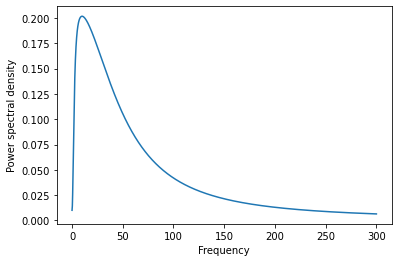

In [60]:
# Define stationary power spectral density function 

alpha = 5
wg = 10
kesi = 0.25
wg2 = 35

def Sx(w):
    return 100*((1 + alpha*w*w)/((wg*wg - w*w)**2 + (2*kesi*w*wg*wg)**2) + (1 + alpha*w*w)/((wg2*wg2 - w*w)**2 + (2*kesi*w*wg2*wg2)**2))   

w_sample = np.linspace(0,300,1000)                                     # Visualize spectral density function
Sx_sample = Sx(w_sample)

plt.plot(w_sample,Sx_sample)
plt.xlabel("Frequency")
plt.ylabel("Power spectral density")
plt.show()

In [61]:
# define time-dependent function component

b = 4
c = 0.8

def g(t):
    return b*(np.exp(-c*t)-np.exp(-2*c*t))

In [62]:
# define evolutionary separable power spectral density function 

def S(w,t):
    return Sx(w) * g(t)

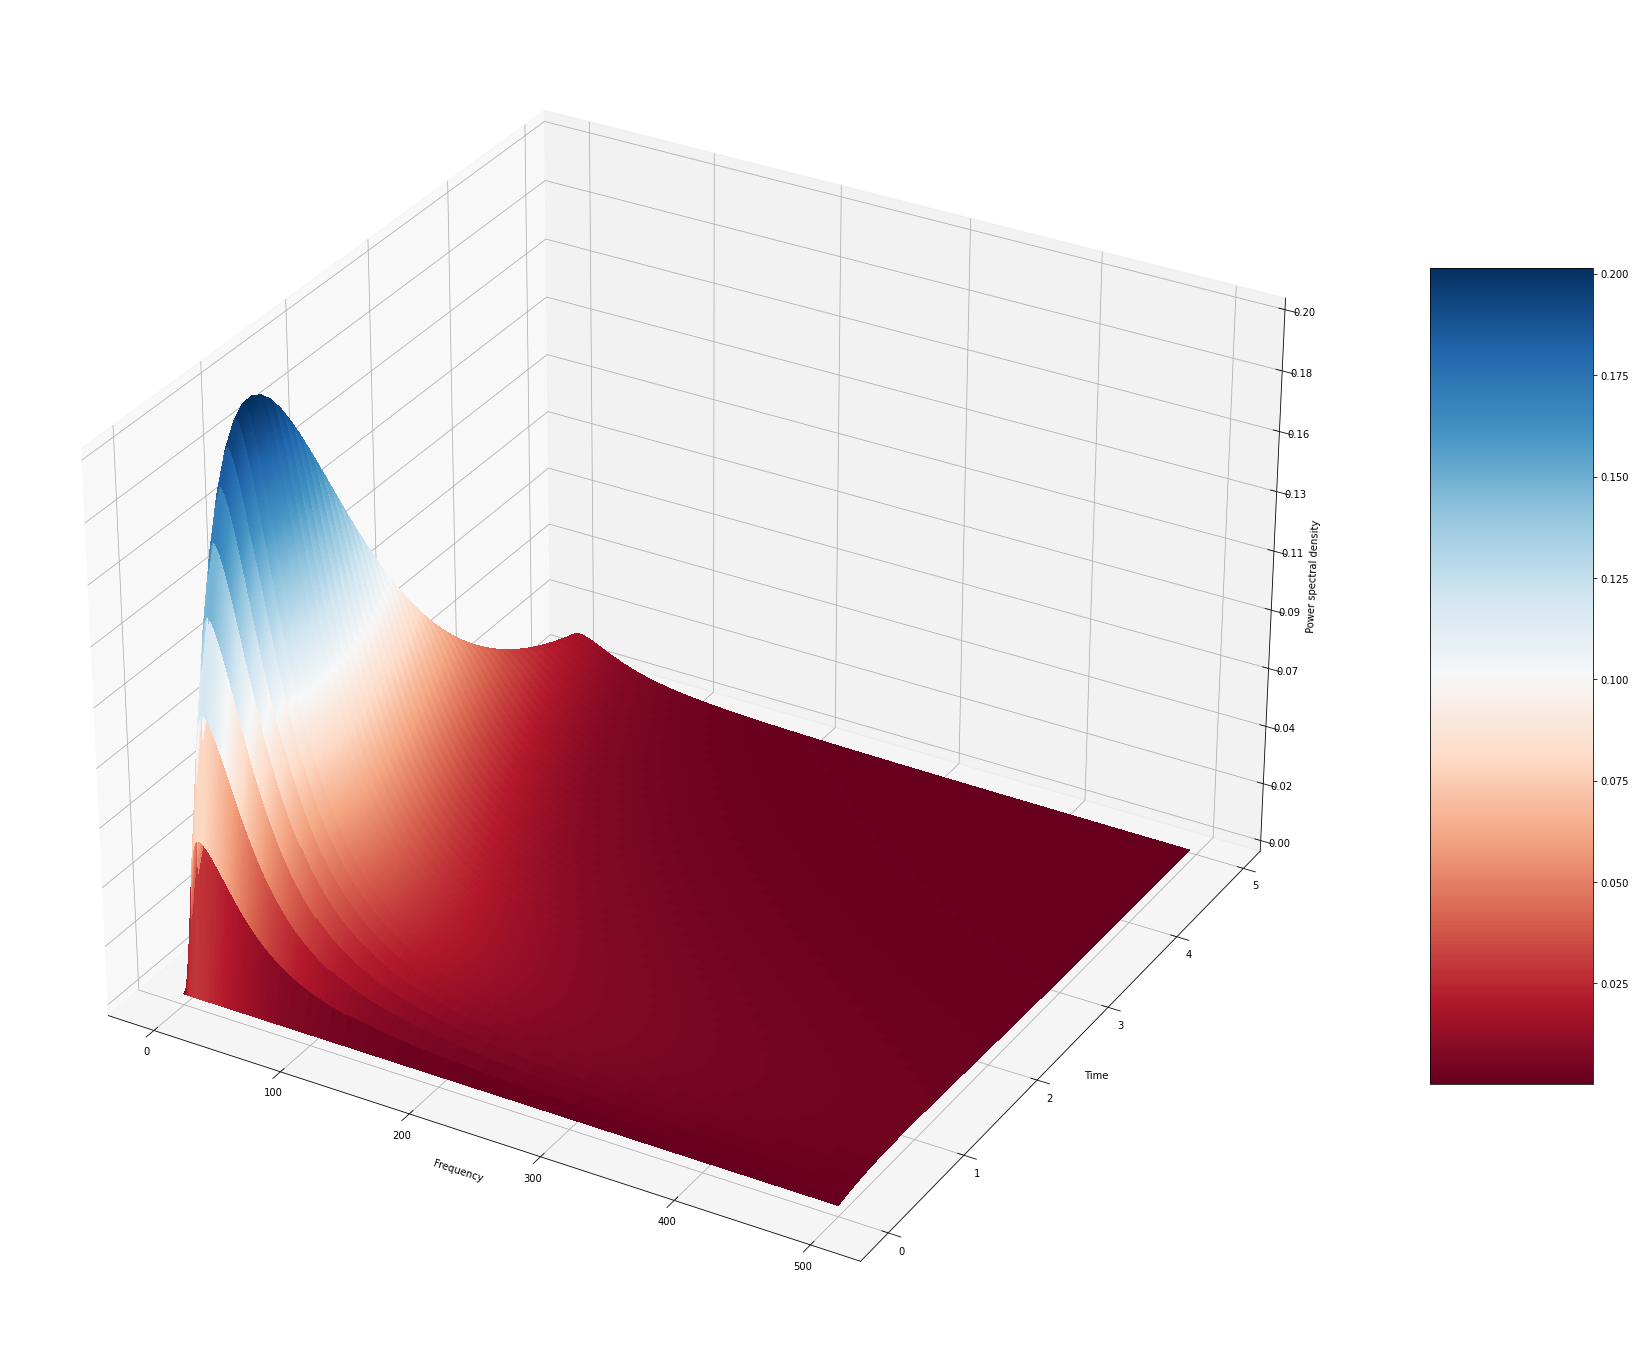

In [67]:
# visualize the defined evolutionary power spectral density function
import warnings
warnings.filterwarnings("ignore")

w = np.arange(0,500,0.1)
t = np.arange(0,5,0.1)
W,T = meshgrid(w, t)
Z = S(W,T)

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(W, T, Z, rstride=1, cstride=1, 
                      cmap=cm.RdBu,linewidth=0, antialiased=False)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)
fig.set_figheight(30)
fig.set_figwidth(30)

ax.set_xlabel('Frequency')
ax.set_ylabel('Time')
ax.set_zlabel('Power spectral density')

plt.show()

Determine upper cut-off frequency wu

The cell below takes some time to run. The result is wu = 1126 rad/s.

In [76]:
epsilo = 0.05

integrate_target = integrate.nquad(lambda w,t: S(w,t), [[0,np.inf],[0,np.inf]])[0] * (1-epsilo)

upper_frequency = 1000
while upper_frequency < 10000:
    if (integrate.nquad(lambda w,t: S(w,t), [[0,upper_frequency],[0,np.inf]])[0] < integrate_target):
        upper_frequency = upper_frequency + 1
    else:
        break

print('Upper cut-off frequency wu = ',upper_frequency,'rad/s')

Upper cut-off frequency wu =  1126 rad/s


Define parameters

In [77]:
upper_frequency = 1126                                            # Re-define upper cut-off frequency based on last step result
N = 500
delt_w = upper_frequency/N
T_0 = 2*np.pi/delt_w
delt_t = 2*np.pi/2/upper_frequency                                # delt_t < 2pi/2wu
N1 = int(T_0/delt_t)

print(' Upper frequency =', upper_frequency,'\n','Number of frequency points N =',N,'\n',
      'Frequency inteval delta w =',delt_w,'\n','Minimal period T0 =',T_0,'\n',
      'Time interval delta t =',delt_t,'\n','Number of time points N1 =',N1)

 Upper frequency = 1126 
 Number of frequency points N = 500 
 Frequency inteval delta w = 2.252 
 Minimal period T0 = 2.7900467616250384 
 Time interval delta t = 0.0027900467616250382 
 Number of time points N1 = 1000


Generate sample functions --
Step 1: Generate uniformly distributed phase 

In [78]:
Matrix_Phi = np.zeros(N)

i = 0
while i < N:
    Matrix_Phi[i] = np.random.uniform(0,1) * 2 * np.pi
    i += 1
np.shape(Matrix_Phi)

(500,)

Step 2: Generate time series based on the formula

In [79]:
f_t1 = np.zeros(N1)

# Note: N1 is the number of time points; N is the number of frequency points

j = 0
while j < N1:
    k = 0
    while k < N:                           # evollutionary power spectral density function: S(w,t)
        f_t1[j] += ((2*S(delt_w*k,delt_t*j)*delt_w)**0.5)*np.cos(delt_w*k*j*delt_t+Matrix_Phi[k])
        k += 1
    f_t1[j] = f_t1[j] * (2**0.5)
    j += 1
    

Visualize the 1st generated time series

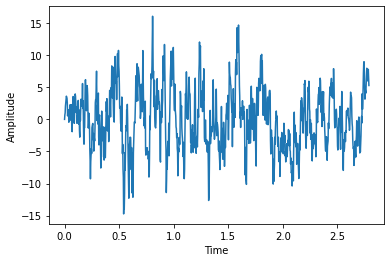

In [80]:
time = np.linspace(0,delt_t*N1,N1)
plt.plot(time,f_t1)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

Step 3: Generate 24 more samples and visualize all the sample functions

In [81]:
ff_t = np.zeros((25,N1))

p = 0
while p < 24:
    # Note: N1 is the number of time points; N is the number of frequency points
    
    Matrix_Phi = np.zeros(N)              # Renew matrix_Phi in each time series

    i = 0
    while i < N:
        Matrix_Phi[i] = np.random.uniform(0,1) * 2 * np.pi
        i += 1
    
    f_t = np.zeros(N1)
    j = 0
    while j < N1:
        k = 0
        while k < N:
            f_t[j] += ((2*S(delt_w*k,delt_t*j)*delt_w)**0.5)*np.cos(delt_w*k*j*delt_t+Matrix_Phi[k])
            k += 1
        f_t[j] = f_t[j] * (2**0.5)                           
        j += 1
    ff_t[p] = f_t                          # results are stored in ff_t matrix
    p += 1
    
ff_t[24] = f_t1

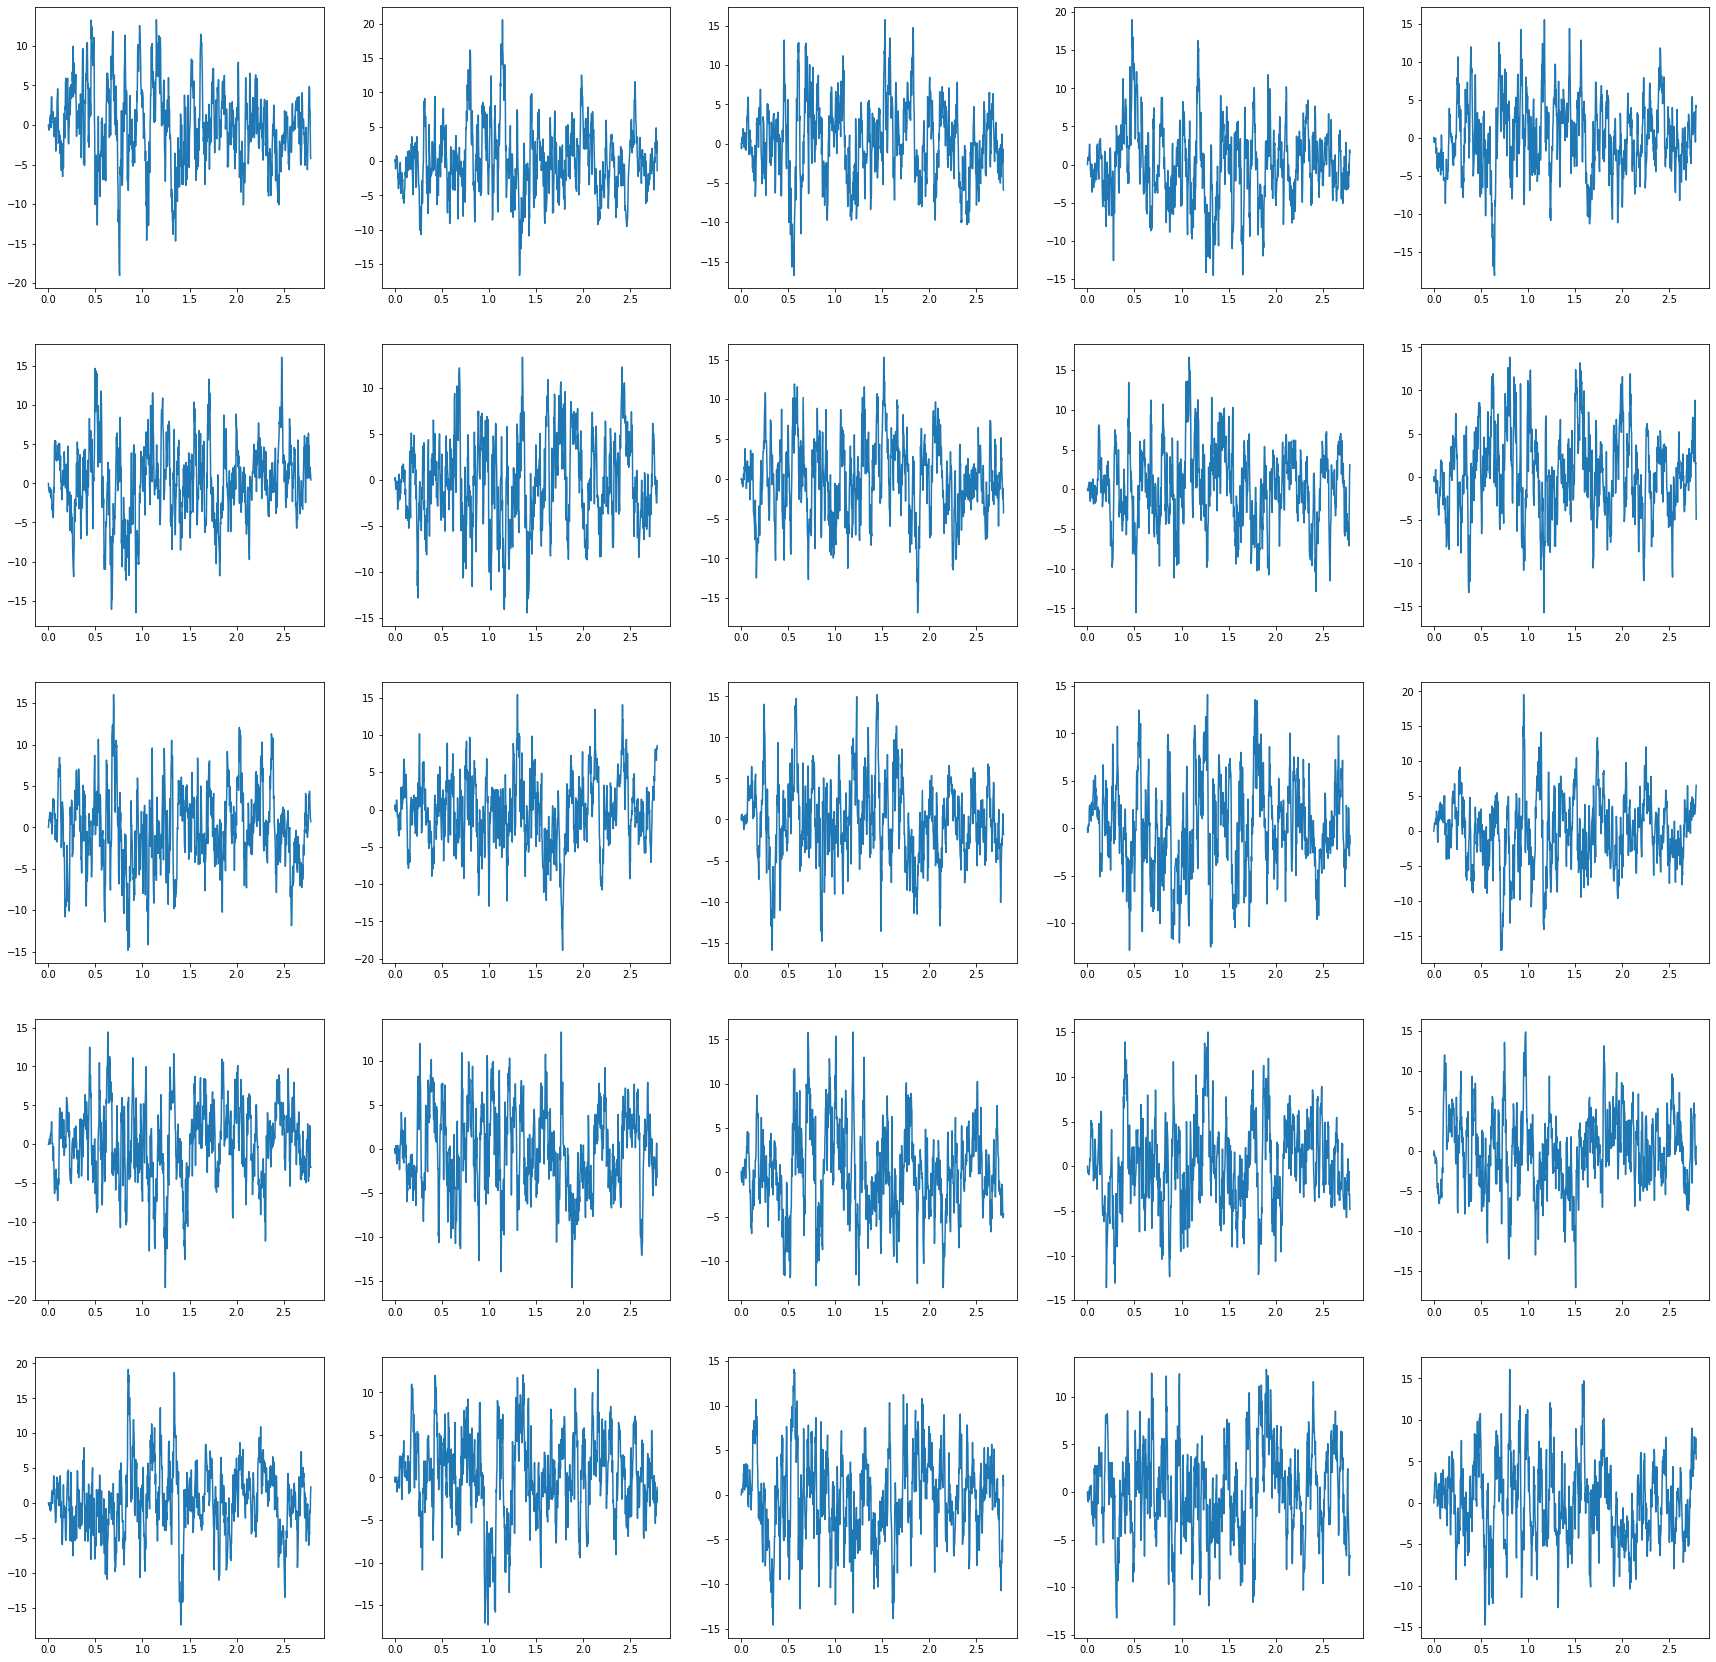

In [82]:
f, axis = plt.subplots(5, 5)

q = 0
while q < 5:
    n = 0
    while n < 5:
        axis[q, n].plot(time, ff_t[q*5+n])
        
        n += 1
    q += 1

f.set_figheight(30)
f.set_figwidth(30)

In [83]:
DF = pd.DataFrame(ff_t.T)
DF                 # columns -- sample time series

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-0.499761,0.199418,-0.632789,0.834752,-0.035701,-0.658096,0.236693,-0.116284,-0.112616,-0.449379,...,0.155799,-0.484735,-0.793603,-0.575129,-0.587546,-0.221217,-0.378382,0.234534,-0.864709,0.692117
2,-0.648956,-0.246286,-0.616951,0.554515,-0.643147,-0.766164,0.208938,-0.068579,-0.212086,-0.564042,...,0.043729,-0.231818,-0.740374,-0.769826,-0.206384,-0.035409,-0.573418,0.621290,-0.777827,1.007530
3,-0.650728,-1.134300,0.388194,0.998006,-0.061414,-1.056384,-0.656937,-0.109297,-0.093398,-0.271170,...,0.340699,0.098446,-1.112771,-0.615985,-0.625196,-0.384914,-0.178863,0.644163,-1.048381,2.082573
4,-0.271821,-0.390758,0.835953,0.592448,-0.132629,-1.145519,-1.032946,-0.596714,0.425316,0.017986,...,0.688328,0.379915,-0.646772,-0.553730,-0.611848,-0.181588,-0.446781,0.374106,-0.268586,2.640939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2.045989,4.837921,-2.454734,0.067216,1.083113,1.958140,-1.658312,-1.838623,-7.137311,5.811476,...,2.378057,-4.163647,-3.240354,-0.555117,-0.873330,-1.051405,-4.518385,-6.387466,-4.301126,6.419308
996,1.941755,1.223334,-0.674619,-1.330667,-0.578163,2.063895,-2.400955,-2.515875,-4.430418,1.498849,...,-0.691545,-0.295487,-4.539772,-3.140767,-1.256070,-1.449576,-2.737449,-3.338463,-5.990643,6.568475
997,-1.172038,2.182676,-3.271720,0.406336,2.204109,1.464806,-2.522969,-1.183287,-0.485436,1.625264,...,-2.783662,0.647053,-4.767877,-3.214651,-1.433541,-1.239143,-1.622505,-1.237003,-8.778588,7.803866
998,-4.096776,2.959788,-5.639205,1.930186,4.269802,1.228879,-1.988471,-2.251261,2.055922,-1.413363,...,-2.995002,-1.335939,-5.140040,-3.123846,-1.698701,1.188592,-2.921180,2.190325,-6.620146,6.305156


In [84]:
DF.to_csv("nonstationary_data.csv")